<a href="https://colab.research.google.com/github/ZachPetroff/Babybot/blob/master/examples/Mobile_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# This code can be used to add a folder in the repository to the Python import
# path, irrespective of whether the notebook is being run in colab or Jupyter.
# (C) 2020 Abe Leite, Indiana University Bloomington
# This code block is released under MIT license. Feel free to make use of
# this code in any projects so long as you reproduce this text.

import os
import sys
import subprocess

repo_URL = 'https://github.com/ZachPetroff/Babybot'
repo_name = repo_URL.split('/')[-1]
code_folder = ''

try:
  repo_path = subprocess.check_output('git rev-parse --show-toplevel', shell=True).decode().strip()
except subprocess.CalledProcessError:
  os.system(f'git clone {repo_URL} --depth 1')
  repo_path = os.path.abspath(repo_name)

code_path = os.path.join(repo_path, code_folder)
sys.path.append(code_path)
print(f'Loading code from {code_path}')

Loading code from /content/Babybot/


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import main
import graph
import simulation

In [35]:
reward = 6e-2 #@param
cost = 3e-2 #@param

separations, connection_changes, mins, ram_mean, lam_mean, rlm_mean, llm_mean, reward, rae_mean, lae_mean, rle_mean, lle_mean, norm_rates, moving_rates, cms, mms, timestep = simulation.simulate(rates=[20, 20, 20, 20], aquisition_time=20, extinction_time=15, reward=reward, cost=cost, mobile_on=True)

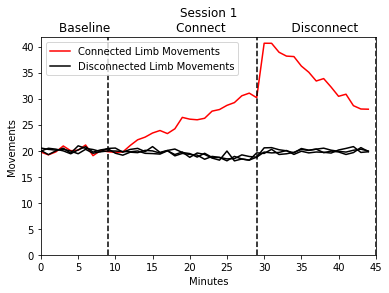

In [36]:
graph.plot_movements(separations, connection_changes, mins, ram_mean, lam_mean, rlm_mean, llm_mean)

During the connected phase, limb movements increase, until they plateau
at about minute thirty. This increase in movements is due to the contingent 
reward provided by moving the connected limb, and thus, moving the mobile.
The reason for the plataeu is explained below. 

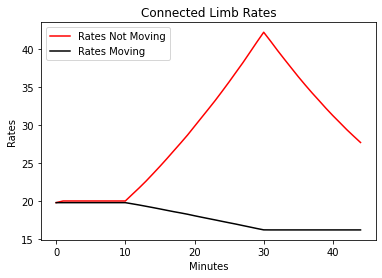

In [38]:
graph.plot_rates(mins, norm_rates, moving_rates)

As shown in the plot above, the rates while the mobile is not moving
plataeu around the same time as the movements plataeu. During this period
the rates while the mobile is moving continue to slightly decrease. 
The plateau in movements is caused by the combination of these rates,
which is why the movements end up somewhere inbetween these two, at 
around 30. 


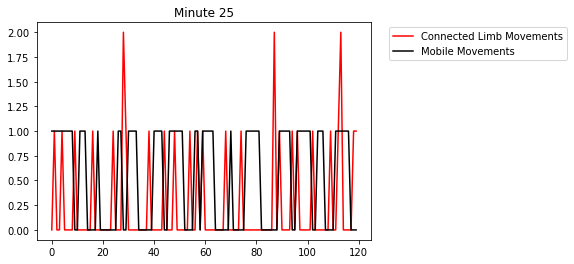

In [39]:
cms = cms[2:]
graph.plot_minute(25, cms, mms, timestep)

The plot above displays that the babybot learns, during the 
connected phase, to kick while the mobile is not moving, then 
wait for it to stop moving again until it kicks again 
(with a few exceptions), in order to preserve energy.

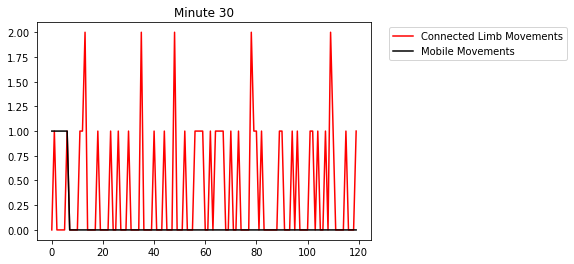

In [41]:
graph.plot_minute(30, cms, mms, timestep)

This plot shows what occurs right after the disconnected phase. The 
babybot kicks become more frequent, in hopes that the mobile will begin 
to move again. However, because the mobile does not move, the babybot 
continues to kick.